In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%run ../setup_behaviour.py

data path: /home/pascal/repo/Jazi_et.al_2023_noInt/data/Jazi_etal_2023_noInter
Project name: autopi_behavior_2021
dataPath: /home/pascal/repo/Jazi_et.al_2023_noInt/data/Jazi_etal_2023_noInter/autopi_behavior_2021


In [2]:
myProject.dataPath

'/home/pascal/repo/Jazi_et.al_2023_noInt/data/Jazi_etal_2023_noInter/autopi_behavior_2021'

In [3]:

fn=myProject.dataPath+"/training_sessions"


print("Reading " + fn)
sessionNamesTraining = pd.read_csv(fn) # this will be a pandas dataframe
#sessionNamesTraining
myProject.createSessionList(sessionNameList=sessionNamesTraining.sessionName.to_list(), needVideos=False)
print("We have {} training sessions".format(len(myProject.sessionList)))

Reading /home/pascal/repo/Jazi_et.al_2023_noInt/data/Jazi_etal_2023_noInter/autopi_behavior_2021/training_sessions
We have 151 training sessions


Load the 2df containing the log files from the training sets. 

In [4]:
fn = myProject.dataPath+"/results/logTrainingDF.csv"
log = pd.read_csv(fn)
# save the DataFram as csv file
fn = myProject.dataPath+"/results/protocolTrainingDF.csv"
protocol = pd.read_csv(fn)
print("log length: {}, protocol length: {}".format(len(log),len(protocol)))

log length: 169431, protocol length: 151


## select only the sessions with the lever_training data

In [5]:
leverTrainingSessions = protocol["session"][protocol["script"] == "autopi_lever_training.py"]

In [6]:
logLever = log[log["session"].isin(leverTrainingSessions)]
print("Number of mice : {}".format(logLever["subject"].nunique()))
print("Number of sessions : {}".format(logLever["session"].nunique()))

Number of mice : 20
Number of sessions : 137


Get the rank of each session for each mouse. We want to have a number from 1 to 6 for each session.

In [7]:
logLever["sessionDateTime"] =  pd.to_datetime(logLever["sessionDateTime"]) # somehow needed
logLever["day"] = logLever["sessionDateTime"].groupby(logLever["subject"]).rank(method="dense")
logLever

,Unnamed: 0,event,time,param,timeWS,session,subject,sessionDateTime,day
0,0,start,1.581003e+09,NaN,0.000000,mn3016-06022020-1629,mn3016,2020-02-06 16:29:00,1.0
1,1,magazineBeamBreak,1.581003e+09,NaN,18.744677,mn3016-06022020-1629,mn3016,2020-02-06 16:29:00,1.0
2,2,magazineBeamReceived,1.581003e+09,NaN,18.930677,mn3016-06022020-1629,mn3016,2020-02-06 16:29:00,1.0
3,3,magazineBeamBreak,1.581003e+09,NaN,19.695677,mn3016-06022020-1629,mn3016,2020-02-06 16:29:00,1.0
4,4,magazineBeamReceived,1.581003e+09,NaN,19.879677,mn3016-06022020-1629,mn3016,2020-02-06 16:29:00,1.0
...,...,...,...,...,...,...,...,...,...
169426,1335,magazineBeamBreak,1.590932e+09,NaN,1773.857026,mn633-31052020-1309,mn633,2020-05-31 13:09:00,3.0
169427,1336,magazineBeamReceived,1.590932e+09,NaN,1774.526026,mn633-31052020-1309,mn633,2020-05-31 13:09:00,3.0
169428,1337,magazineBeamBreak,1.590932e+09,NaN,1798.139047,mn633-31052020-1309,mn633,2020-05-31 13:09:00,3.0
169429,1338,magazineBeamReceived,1.590932e+09,NaN,1798.174047,mn633-31052020-1309,mn633,2020-05-31 13:09:00,3.0


## Session summary statistics

Now we want to get summary statistics for each day-mouse combination. 
This will be stored as a new pandas data frame.

We write a function that returns a dataframe with the variables we want per day-mouse, then apply it to a groupby dataframe.

In [8]:
def mySummary(df):
    duration=df["time"].max() - df["time"].min()
    leverPresses=np.sum((df["event"]=="lever_press") |(df["event"]=="leverPress"))
    rewards=np.sum(df["event"]=="pellet_delivery_report")
    leverPressesPerReward = leverPresses/rewards
    rewardRate = rewards/duration*60 # per minutes
    return pd.DataFrame({"duration": [duration],
                        "leverPresses": [leverPresses],
                        "rewards": [rewards],
                        "leverPressesPerReward": [leverPressesPerReward],
                        "rewardRate": [rewardRate]})

sDf = logLever.groupby(["subject","day"]).apply(mySummary).reset_index()

# only keep the first 6 days for the figure
sDf = sDf[sDf.day < 7 ]


In [9]:
sDf

,subject,day,level_2,duration,leverPresses,rewards,leverPressesPerReward,rewardRate
0,mn3016,1.0,0,1802.376751,23,13,1.769231,0.432762
1,mn3016,2.0,0,1802.524856,50,22,2.272727,0.732306
2,mn3016,3.0,0,1802.443332,55,31,1.774194,1.031933
3,mn3016,4.0,0,1802.407652,88,76,1.157895,2.529949
4,mn3016,5.0,0,1026.867459,132,100,1.320000,5.843013
...,...,...,...,...,...,...,...,...
132,mn633,1.0,0,1802.560159,32,22,1.454545,0.732292
133,mn633,2.0,0,1802.510743,35,25,1.400000,0.832173
134,mn633,3.0,0,1802.479396,122,61,2.000000,2.030536
135,mn633,4.0,0,1802.477537,118,76,1.552632,2.529851


In [10]:
print("number of mice: {}".format(sDf["subject"].nunique()))
print("number of sessions: {}".format(len(sDf["subject"])))

number of mice: 20
number of sessions: 117


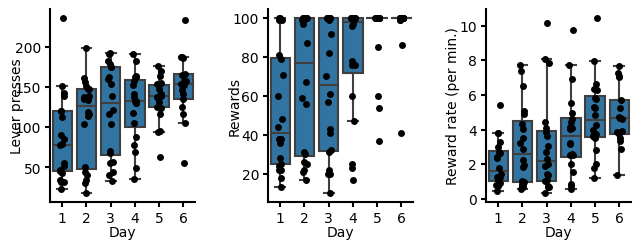

In [11]:
col=3
row=1
sizePerPlot=2.5
fig = plt.figure(figsize=(col*sizePerPlot,row*sizePerPlot))
gs = gridspec.GridSpec(row,col,wspace=0.5, hspace=0.3)
fig.tight_layout()

#############################################
#############################################
##b
ax = plt.subplot(gs[0,0], ) # get a subplot
sns.boxplot(y='leverPresses', x='day', 
                 data=sDf,showfliers=False,color=sns.color_palette()[0] )
sns.stripplot(y='leverPresses', x='day', 
                 data=sDf,color="black")
plt.xticks(range(6),labels=["1","2","3","4","5","6"])
plt.xlabel("Day")
plt.ylabel("Lever presses")
ax.yaxis.set_label_coords(-0.18,0.5)
ax.xaxis.set_label_coords(0.5, -0.12)
ax.tick_params(axis='both', which='major', pad=3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=1.5)
ax.yaxis.set_tick_params(width=1.5)


#############################################
# c
ax = plt.subplot(gs[0,1], ) # get a subplot
sns.boxplot(y='rewards', x='day', 
                 data=sDf,showfliers=False,color=sns.color_palette()[0] )
sns.stripplot(y='rewards', x='day', 
                 data=sDf,color="black")
plt.xticks(range(6),labels=["1","2","3","4","5","6"])
plt.xlabel("Day")
plt.ylabel("Rewards")
ax.xaxis.set_label_coords(0.5, -0.12)
ax.yaxis.set_label_coords(-0.18,0.5)
ax.tick_params(axis='both', which='major', pad=3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=1.5)
ax.yaxis.set_tick_params(width=1.5)


#############################################
# d
ax = plt.subplot(gs[0,2], ) # get a subplot
sns.boxplot(y='rewardRate', x='day', 
                 data=sDf,showfliers=False,color=sns.color_palette()[0] )
sns.stripplot(y='rewardRate', x='day', 
                 data=sDf,color="black")
plt.xticks(range(6),labels=["1","2","3","4","5","6"])
plt.xlabel("Day")
plt.ylabel("Reward rate (per min.)")
ax.xaxis.set_label_coords(0.5, -0.12)
ax.yaxis.set_label_coords(-0.18,0.5)
ax.tick_params(axis='both', which='major', pad=3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=1.5)
ax.yaxis.set_tick_params(width=1.5)


## ExtDataFig2

In [12]:
fn =  myProject.dataPath+"/results/trialsDF.csv"
df = pd.read_csv(fn)


In [13]:
import pickle

fn = myProject.dataPath+"/results/speedProfile.pkl"
print(fn)
sProfile = pickle.load(open(fn, "rb" ) )

if sProfile["searchTotal"].shape[0] != len(df):
    print("Problem with the length of sProfile and df")

/home/pascal/repo/Jazi_et.al_2023_noInt/data/Jazi_etal_2023_noInter/autopi_behavior_2021/results/speedProfile.pkl


Get a first idea of the number of trials we have in our dataset.

In [14]:
print("Number of mice : {}".format(len(df.subject.unique())))
print("Number of sessions : {}".format(len(df.sessionName.unique())))
print("Number of trials : {}".format(len(df)))
print("Percentage of invalid trials: {:.3} %".format(len(df[df.valid==False])/len(df)*100))
print("Number of dark trials: {}".format(len(df[df.light=="dark"])))
print("Number of light trials: {}".format(len(df[df.light=="light"])))
print("Median number of trials per session: {}".format(df.sessionName.value_counts().median()))
print("Mean number of trials per session: {:.3}".format(df.sessionName.value_counts().mean()))
print("Minimum number of trials per session: {}".format(df.sessionName.value_counts().min()))
print("Maximum number of trials per session: {}".format(df.sessionName.value_counts().max()))

Number of mice : 13
Number of sessions : 67
Number of trials : 4787
Percentage of invalid trials: 1.75 %
Number of dark trials: 2194
Number of light trials: 2593
Median number of trials per session: 73.0
Mean number of trials per session: 71.4
Minimum number of trials per session: 36
Maximum number of trials per session: 104


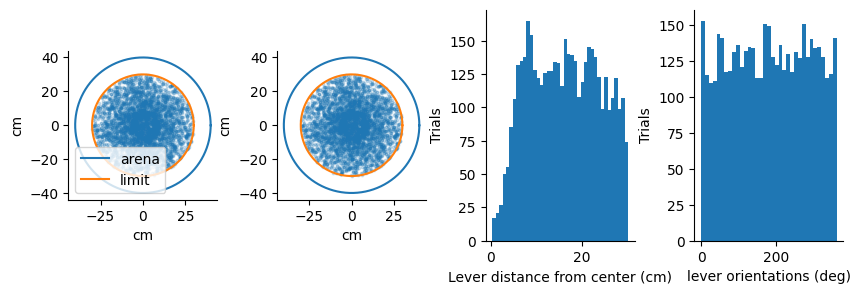

In [17]:
# to remove trials at the edge
maxDistance=30

df["leverDistanceCenter"] = np.sqrt((df.leverPressX.values**2 + df.leverPressY.values**2))

fig, axes = plt.subplots(1,4,figsize=(10,3))

plt.subplots_adjust(wspace=0.4)
#axes[0].set_aspect('equal', adjustable='box')

axes[0].scatter(df.leverPressX,df.leverPressY,s=3,alpha=0.2)
arena=np.arange(start=0,stop=2*np.pi,step=0.02)
axes[0].plot(np.cos(arena)*40,np.sin(arena)*40,label="arena")
axes[0].plot(np.cos(arena)*maxDistance,np.sin(arena)*maxDistance,label="limit")
axes[0].set_xlabel("cm")
axes[0].set_ylabel("cm")
axes[0].legend(loc="best")
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_aspect('equal', adjustable='box')

axes[1].scatter(df.leverPressX,df.leverPressY,s=3,alpha=0.2)
arena=np.arange(start=0,stop=2*np.pi,step=0.02)
axes[1].plot(np.cos(arena)*40,np.sin(arena)*40,label="arena")
axes[1].plot(np.cos(arena)*30,np.sin(arena)*30,label="limit")
axes[1].set_xlabel("cm")
axes[1].set_ylabel("cm")
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_aspect('equal', adjustable='box')

axes[2].hist(df.leverDistanceCenter,bins=40)
axes[2].set_xlabel("Lever distance from center (cm)")
axes[2].set_ylabel("Trials")
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

# clean the dataset from these trials
boolIndices = df.leverDistanceCenter<maxDistance
df = df[boolIndices]

axes[3].hist(df.leverPositionOri, bins=35)
axes[3].set_xlabel('lever orientations (deg)')
axes[3].set_ylabel('Trials')
axes[3].spines['top'].set_visible(False)
axes[3].spines['right'].set_visible(False)
plt.show()